In [492]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [493]:
x_train = pd.read_csv(r'C:\Users\lenovo\PycharmProjects\pythonProject3\Data\CEV_contest_train_dataset.csv')
y_train = pd.read_csv(r'C:\Users\lenovo\PycharmProjects\pythonProject3\Data\CEV_contest_train_dataset_labels.csv')

In [494]:
print(x_train.isna().sum())
print(y_train.isna().sum())

Unnamed: 0    0
SEX           0
NACCAGEB      0
NACCMOCA      0
NACCFAM       0
EDUC          0
NACCGDS       0
NACCBMI       0
SMOKYRS       0
NACCNE4S      0
INDEPEND      0
res1          0
res2          0
res3          0
res4          0
ALCOHOL0      0
ALCOHOL1      0
ALCOHOL2      0
APOE1         0
APOE2         0
APOE3         0
APOE4         0
APOE5         0
APOE6         0
MEMORY        0
ORIENT        0
JUDGMENT      0
COMMUN        0
HOMEHOBB      0
PERSCARE      0
dtype: int64
Unnamed: 0    0
CDRGLOB       0
dtype: int64


# One Hot Encoder

In [495]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')

enc_df = pd.DataFrame(enc.fit_transform(y_train[['CDRGLOB']]).toarray())
y_train = y_train.join(enc_df)

In [496]:
x_train = x_train.drop(['Unnamed: 0'], axis=1)
y_train = y_train.drop(['Unnamed: 0'], axis=1)

In [497]:
y_train

,CDRGLOB,0,1,2,3
0,0.00,1.0,0.0,0.0,0.0
1,0.50,0.0,0.0,1.0,0.0
2,0.00,1.0,0.0,0.0,0.0
3,0.25,0.0,1.0,0.0,0.0
4,0.25,0.0,1.0,0.0,0.0
...,...,...,...,...,...
5279,0.25,0.0,1.0,0.0,0.0
5280,0.00,1.0,0.0,0.0,0.0
5281,0.00,1.0,0.0,0.0,0.0
5282,0.25,0.0,1.0,0.0,0.0


In [498]:
#y_train = y_train.set_index(['Unnamed: 0'])
#x_train = x_train.set_index(['Unnamed: 0'])

# Train-Validation Split

In [499]:
y_train.columns

Index(['CDRGLOB', 0, 1, 2, 3], dtype='object')

In [500]:
x_train, x_val, y_train, y_val = train_test_split(x_train,
                                                    y_train[[0,1,2,3]],
                                                    test_size=.2,
                                                    random_state=42)

In [501]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(4227, 29)
(4227, 4)
(1057, 29)
(1057, 4)


# Deep Learning Model

In [502]:
##
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense, Embedding, GlobalAveragePooling1D
##
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="sigmoid")
])
##
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
##
history = model.fit(x_train,
                    y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_val, y_val),)
##

Epoch 1/30
9/9 [==============================] - 1s 17ms/step - loss: 1.4270 - accuracy: 0.4892 - val_loss: 0.5826 - val_accuracy: 0.5080
Epoch 2/30
9/9 [==============================] - 0s 4ms/step - loss: 0.5605 - accuracy: 0.4996 - val_loss: 0.4978 - val_accuracy: 0.5336
Epoch 3/30
9/9 [==============================] - 0s 4ms/step - loss: 0.4710 - accuracy: 0.5309 - val_loss: 0.4283 - val_accuracy: 0.5743
Epoch 4/30
9/9 [==============================] - 0s 4ms/step - loss: 0.4304 - accuracy: 0.5735 - val_loss: 0.4044 - val_accuracy: 0.5799
Epoch 5/30
9/9 [==============================] - 0s 4ms/step - loss: 0.4119 - accuracy: 0.5813 - val_loss: 0.3823 - val_accuracy: 0.6291
Epoch 6/30
9/9 [==============================] - 0s 4ms/step - loss: 0.3863 - accuracy: 0.6272 - val_loss: 0.3788 - val_accuracy: 0.6320
Epoch 7/30
9/9 [==============================] - 0s 4ms/step - loss: 0.3803 - accuracy: 0.6399 - val_loss: 0.3685 - val_accuracy: 0.6452
Epoch 8/30
9/9 [=================

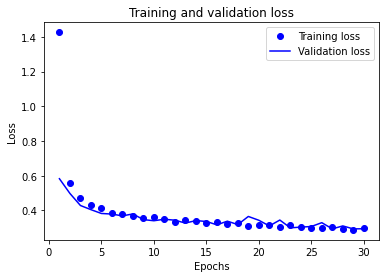

In [503]:
history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt
history_dict = history.history

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

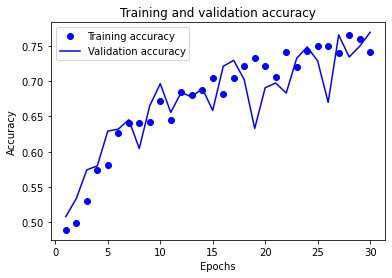

In [504]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Confusion Matrix

In [505]:
def add_one_argmax_score(x):

    x = x

    return x
##
y_predict = add_one_argmax_score(np.argmax(model.predict(x_val),axis=1))
##
def reverse_encode(y_df):

    y_df['score'] = (y_df.iloc[:, 0:] == 1).idxmax(1)['score'] = (y_df.iloc[:, 0:] == 1).idxmax(1)
    for i in range(0,len(y_df)):
        if y_df.iloc[i,-1] == '0':
            y_df.iloc[i,-1] = 1
        elif y_df.iloc[i,-1] == '1':
            y_df.iloc[i,-1] = 2
        elif y_df.iloc[i,-1]== '2':
            y_df.iloc[i,-1] = 3
        elif y_df.iloc[i,-1]== '3':
            y_df.iloc[i,-1] = 4
##
reverse_encode(y_val)
y_val

34/34 [==============================] - 0s 737us/step


,0,1,2,3,score
2585,0.0,1.0,0.0,0.0,1
3158,1.0,0.0,0.0,0.0,0
290,1.0,0.0,0.0,0.0,0
751,1.0,0.0,0.0,0.0,0
4504,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...
602,0.0,0.0,1.0,0.0,2
4408,0.0,1.0,0.0,0.0,1
3243,0.0,1.0,0.0,0.0,1
1467,0.0,1.0,0.0,0.0,1


In [506]:
y_predict = pd.DataFrame(y_predict)
y_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057 entries, 0 to 1056
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       1057 non-null   int64
dtypes: int64(1)
memory usage: 8.4 KB


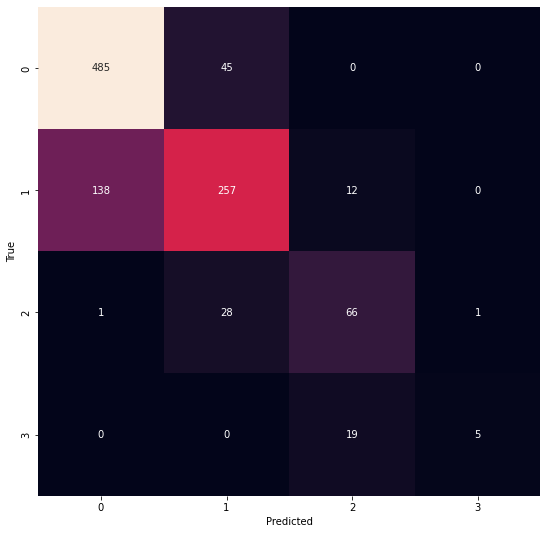

In [507]:
def conf_matrix(cm):

    plt.figure(figsize=(9,9))
    ax = sns.heatmap(cm,
                     annot= True,
                     fmt = '.4g',
                     cbar=0,
                     xticklabels=[0,1,2,3],
                     yticklabels=[0,1,2,3],)
    ax.set(xlabel='Predicted', ylabel='True')
    plt.show()
##
test_cm = confusion_matrix(y_val['score'], y_predict)
conf_matrix(test_cm)

In [508]:
from sklearn.metrics import classification_report

print(classification_report(y_predict, y_val['score']))

              precision    recall  f1-score   support

           0       0.92      0.78      0.84       624
           1       0.63      0.78      0.70       330
           2       0.69      0.68      0.68        97
           3       0.21      0.83      0.33         6

    accuracy                           0.77      1057
   macro avg       0.61      0.77      0.64      1057
weighted avg       0.80      0.77      0.78      1057

